In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project\notebooks
Moving up to the parent directory
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project


In [2]:
from stage0_configs import *
from modules.helper import *
info = main_config()


Welcome to the Abaqus parameter calibration project


The configurations you have chosen: 

+------------------------+-------------+
|     Global Configs     | User choice |
+------------------------+-------------+
| Number of initial sims |      20     |
|  Initial sims spacing  |     1000    |
|   Optimize strategy    |     SOO     |
|        Material        | DP1000_room |
|     Hardening law      |    Swift    |
|        Geometry        |    NDBR50   |
|      Curve index       |      2      |
|     Optimizer name     |      BO     |
|   Deviation percent    |      5      |
+------------------------+-------------+

Generating necessary directories

The path to your main project folder is

c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project



In [15]:
resultPath = info['resultPath']
commonIterationResultPath = f"{resultPath}/iteration"

# List all the files in the iteration result folder
fileIndex = os.listdir(commonIterationResultPath)[0:-1]
print(fileIndex)
FD_Curves = {}
flowCurves = {}

for index in fileIndex:
    print(index)
    parameters = pd.read_csv(f"{commonIterationResultPath}/{index}/parameters.csv")
    # Convert to dictionary
    parameters = parameters.set_index('Parameter').T.to_dict()
    for param in parameters:
        parameters[param] = parameters[param]['Value']
    paramsTuple = tuple(parameters.items())
    FD_Curve = pd.read_csv(f"{commonIterationResultPath}/{index}/FD_Curve.csv")
    #print(FD_Curve)
    FD_Curves[paramsTuple] = {}
    FD_Curves[paramsTuple]['displacement'] = FD_Curve['displacement,mm'].to_numpy()
    FD_Curves[paramsTuple]['force'] = FD_Curve['force,N'].to_numpy()
    flowCurve = pd.read_csv(f"{commonIterationResultPath}/{index}/flowCurve.csv")
    flowCurves[paramsTuple] = {}
    flowCurves[paramsTuple]['strain'] = flowCurve['strain,-'].to_numpy()
    flowCurves[paramsTuple]['stress'] = flowCurve['stress,MPa'].to_numpy()
    print(flowCurves)

np.save(f"{commonIterationResultPath}/common/FD_Curves.npy", FD_Curves)
np.save(f"{commonIterationResultPath}/common/flowCurves.npy", flowCurves)
    

['1', '2', '3']
1
{(('c1', 2000.0), ('c2', 0.0005035151597805), ('c3', 0.0775040463017926)): {'strain': array([0.000e+00, 2.000e-03, 4.000e-03, 6.000e-03, 8.000e-03, 1.000e-02,
       1.200e-02, 1.400e-02, 1.600e-02, 1.800e-02, 2.000e-02, 2.200e-02,
       2.400e-02, 2.600e-02, 2.800e-02, 3.000e-02, 3.200e-02, 3.400e-02,
       3.600e-02, 3.800e-02, 4.000e-02, 4.200e-02, 4.400e-02, 4.600e-02,
       4.800e-02, 5.000e-02, 5.200e-02, 5.400e-02, 5.600e-02, 5.800e-02,
       6.000e-02, 6.200e-02, 6.400e-02, 6.600e-02, 6.800e-02, 7.000e-02,
       7.200e-02, 7.400e-02, 7.600e-02, 7.800e-02, 8.000e-02, 8.200e-02,
       8.400e-02, 8.600e-02, 8.800e-02, 9.000e-02, 9.200e-02, 9.400e-02,
       9.600e-02, 9.800e-02, 1.000e-01, 1.020e-01, 1.040e-01, 1.060e-01,
       1.080e-01, 1.100e-01, 1.120e-01, 1.140e-01, 1.160e-01, 1.180e-01,
       1.200e-01, 1.220e-01, 1.240e-01, 1.260e-01, 1.280e-01, 1.300e-01,
       1.320e-01, 1.340e-01, 1.360e-01, 1.380e-01, 1.400e-01, 1.420e-01,
       1.440e-01, 1.

[0.0, 0.0300013, 0.0600055, 0.0899964, 0.119974, 0.14993, 0.179882, 0.209834, 0.239786, 0.269773, 0.299776, 0.32978, 0.359783, 0.389786, 0.41979, 0.449789, 0.479764, 0.509665, 0.539566, 0.569467, 0.599481, 0.629625, 0.659766, 0.689906, 0.720051, 0.750191, 0.780331, 0.810476, 0.840617, 0.870757, 0.900902, 0.931042, 0.961187, 0.991327, 1.02147, 1.05161, 1.08175, 1.11148, 1.14121, 1.17094, 1.20067, 1.2304, 1.26013, 1.28986, 1.31959, 1.34931, 1.37904, 1.40877, 1.4385, 1.46823, 1.49823, 1.52853, 1.55882, 1.58911, 1.61941, 1.6497, 1.68, 1.71029, 1.74058, 1.77088, 1.80117, 1.83146, 1.86176, 1.89205, 1.92234, 1.95263, 1.98293, 2.01321, 2.04308, 2.07295, 2.10281, 2.1329, 2.16291, 2.19289, 2.2228, 2.25296, 2.28268, 2.313, 2.34291, 2.3729, 2.40361, 2.43348, 2.46269, 2.49333, 2.52359, 2.55344, 2.58253, 2.61314, 2.64386, 2.67346, 2.70281, 2.73294, 2.76352, 2.79339, 2.82223, 2.85212, 2.88334, 2.91374, 2.944, 2.9728, 3.0016]


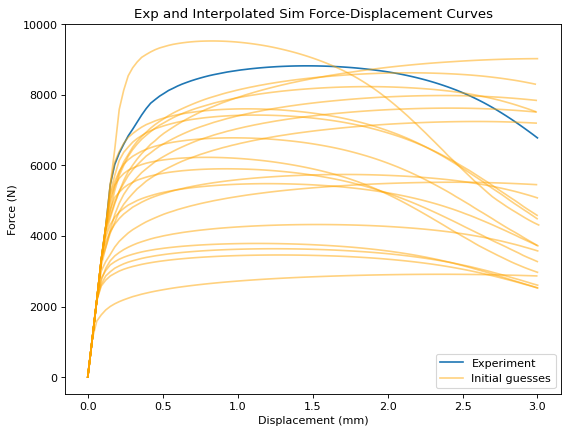

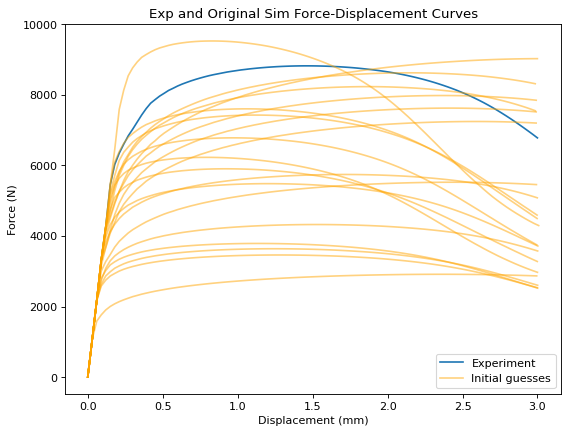

In [ ]:
resultPath = info['resultPath']
targetPath = info['targetPath']
# Load csv file
target = pd.read_csv(f"{targetPath}/FD_Curve.csv")
expForce = target['force/N'].to_numpy()
expDisplacement = target['displacement/mm'].to_numpy() 
#print(max(expDisplacement))
targetCurve = {}
targetCurve['displacement'] = expDisplacement
targetCurve['force'] = expForce

initial_original_FD_Curves = np.load(f"{resultPath}/initial/common/FD_Curves.npy", allow_pickle=True).tolist()
initial_interpolated_FD_Curves = interpolating_FD_Curves(initial_original_FD_Curves, targetCurve)
print(list(initial_interpolated_FD_Curves.values())[0]['displacement'])


# print(maxDisp)
# Plotting all FD curves
figure(figsize=(8, 6), dpi=80)
plt.plot(expDisplacement, expForce, label='Experiment')
for param in initial_interpolated_FD_Curves:
    plt.plot(initial_interpolated_FD_Curves[param]['displacement'], initial_interpolated_FD_Curves[param]['force'], color='orange', alpha=0.5,
             #label=param
             )
plt.plot([],[], color='orange', alpha=0.5, label='Initial guesses')
plt.title('Exp and Interpolated Sim Force-Displacement Curves')
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
plt.legend()

# print(maxDisp)
# Plotting all FD curves
figure(figsize=(8, 6), dpi=80)
plt.plot(expDisplacement, expForce, label='Experiment')
for param in initial_original_FD_Curves:
    plt.plot(initial_original_FD_Curves[param]['displacement'], initial_original_FD_Curves[param]['force'], color='orange', alpha=0.5,
             #label=param
             )
plt.plot([],[], color='orange', alpha=0.5, label='Initial guesses')
plt.title('Exp and Original Sim Force-Displacement Curves')
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
plt.legend()

